In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import math

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
trainds = pd.read_csv(r"C:\Users\saaip\Downloads\titanic\train.csv")


In [3]:
trainds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
testds = pd.read_csv(r"C:\Users\saaip\Downloads\titanic\test.csv")

In [5]:
submission = pd.read_csv(r"C:\Users\saaip\Downloads\titanic\gender_submission.csv")

In [6]:
trainds.shape

(891, 12)

In [7]:
testds.shape

(418, 11)

In [8]:
#check for nullvalues in train & test.
trainds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
testds.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:

data = pd.concat([trainds, testds])

In [11]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
data.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

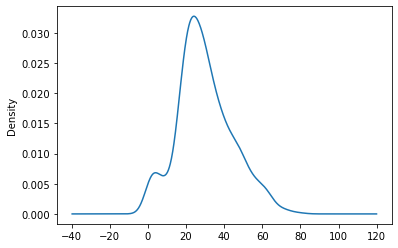

In [13]:
data['Age'].plot(kind = "density")

<AxesSubplot:ylabel='Frequency'>

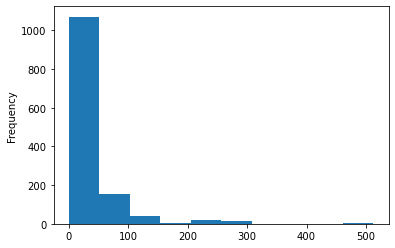

In [14]:
data['Fare'].plot(kind = "hist")


<AxesSubplot:>

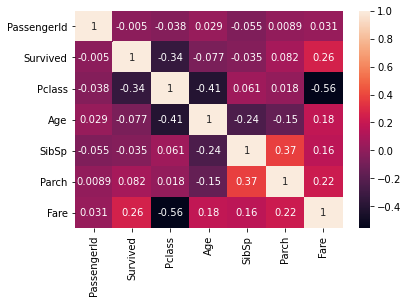

In [15]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

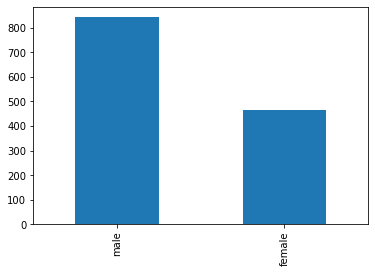

In [16]:
data["Sex"].value_counts().plot(kind = "bar")

<AxesSubplot:>

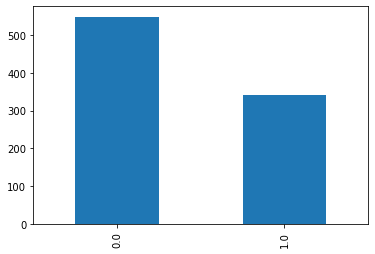

In [17]:
data["Survived"].value_counts().plot(kind = "bar")

<AxesSubplot:>

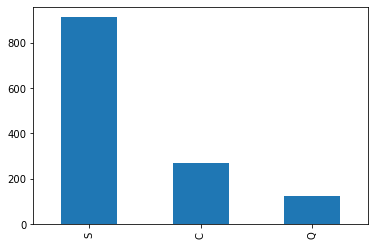

In [18]:
data["Embarked"].value_counts().plot(kind = "bar")

<AxesSubplot:>

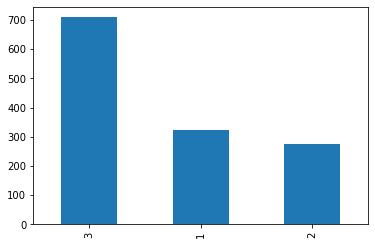

In [19]:

data["Pclass"].value_counts().plot(kind = "bar")

<AxesSubplot:>

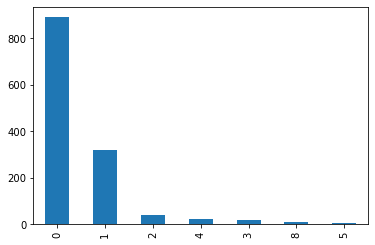

In [20]:
data["SibSp"].value_counts().plot(kind = "bar")

<AxesSubplot:>

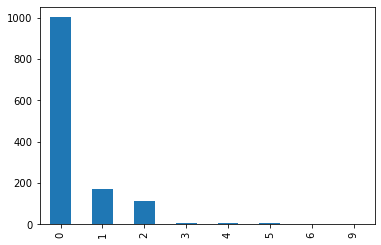

In [21]:
data["Parch"].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='Pclass'>

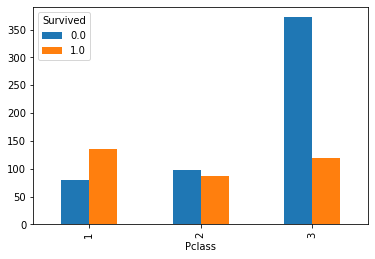

In [22]:
pd.crosstab(data["Pclass"],data['Survived']).plot(kind = "bar") 

<AxesSubplot:xlabel='Embarked'>

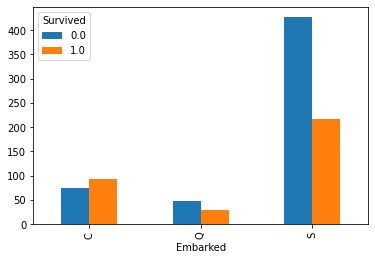

In [23]:

pd.crosstab(data["Embarked"],data['Survived']).plot(kind = 'bar')

<AxesSubplot:xlabel='Sex'>

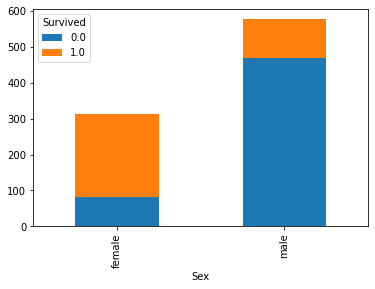

In [24]:
pd.crosstab(data["Sex"],data['Survived']).plot(kind = 'bar', stacked=True) 

<AxesSubplot:xlabel='Parch'>

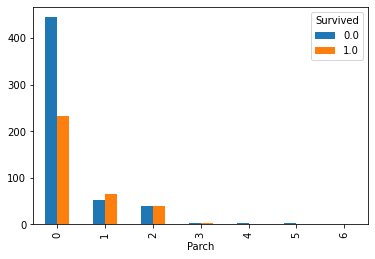

In [25]:
pd.crosstab(data["Parch"],data['Survived']).plot(kind = 'bar') 

<AxesSubplot:xlabel='SibSp'>

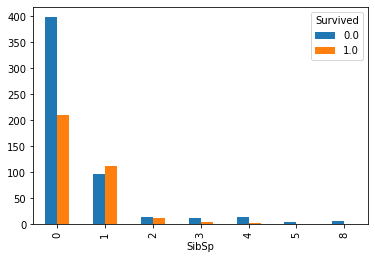

In [26]:
pd.crosstab(data["SibSp"],data['Survived']).plot(kind = 'bar') 

In [27]:
print('The mean of age is',trainds["Age"].mean(skipna=True))

The mean of age is 29.69911764705882


In [28]:
print('The median of age is',trainds["Age"].median(skipna=True))

The median of age is 28.0


In [29]:
print('percentage of missing cabin record is',trainds["Cabin"].isnull().sum()/trainds.shape[0]*100)

percentage of missing cabin record is 77.10437710437711


In [30]:
print('percentage of missing age record is',trainds["Age"].isnull().sum()/trainds.shape[0]*100)

percentage of missing age record is 19.865319865319865


In [31]:
print('percentage of missing embarked record is',trainds["Embarked"].isnull().sum()/trainds.shape[0]*100)

percentage of missing embarked record is 0.22446689113355783


In [32]:
print('percentage of missing fare record is',trainds["Fare"].isnull().sum()/trainds.shape[0]*100)

percentage of missing fare record is 0.0


In [33]:
data['Age'].fillna(trainds["Age"].median(skipna=True), inplace=True)

In [34]:
data['Embarked'].fillna('S', inplace=True)

In [35]:
data['Fare'].fillna(trainds["Fare"].median(skipna=True), inplace=True)

In [36]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [37]:
data["Sex"].replace({"female":1, "male":0}, inplace=True)

In [38]:
data['Embarked'].replace({'C': 3, 'Q': 2,'S': 1}, inplace=True)

In [39]:
data.drop('Cabin',axis=1,inplace=True)

In [40]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,28.0,0,0,A.5. 3236,8.0500,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,3
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,1
416,1308,NaN,3,"Ware, Mr. Frederick",0,28.0,0,0,359309,8.0500,1


In [41]:

data1 = data.drop(columns=['Ticket', 'Name'])

In [42]:
num_cols = data1.select_dtypes(include = np.number).drop(columns='Survived').columns

In [43]:
cat_cols = data1.select_dtypes(exclude= np.number).columns

In [44]:
scaler = StandardScaler()

In [45]:
num_pp = pd.DataFrame(scaler.fit_transform(data1[num_cols]), columns=num_cols)

In [46]:
num_pp.shape

(1309, 8)

In [47]:
num_pp

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.730728,0.841916,-0.743497,-0.581628,0.481288,-0.445000,-0.503291,-0.622279
1,-1.728082,-1.546098,1.344995,0.658652,0.481288,-0.445000,0.734744,1.834926
2,-1.725435,0.841916,1.344995,-0.271558,-0.479087,-0.445000,-0.490240,-0.622279
3,-1.722789,-1.546098,1.344995,0.426099,0.481288,-0.445000,0.383183,-0.622279
4,-1.720143,0.841916,-0.743497,0.426099,-0.479087,-0.445000,-0.487824,-0.622279
...,...,...,...,...,...,...,...,...
1304,1.720143,0.841916,-0.743497,-0.116523,-0.479087,-0.445000,-0.487824,-0.622279
1305,1.722789,-1.546098,1.344995,0.736169,-0.479087,-0.445000,1.462034,1.834926
1306,1.725435,0.841916,-0.743497,0.697411,-0.479087,-0.445000,-0.503291,-0.622279
1307,1.728082,0.841916,-0.743497,-0.116523,-0.479087,-0.445000,-0.487824,-0.622279


In [48]:

num_pp.reset_index(drop='index', inplace=True)

In [49]:
data1.reset_index(drop='index', inplace=True)

In [50]:
pp_data = pd.concat([num_pp, data1['Survived']], axis=1)

In [51]:
pp_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,-1.730728,0.841916,-0.743497,-0.581628,0.481288,-0.445000,-0.503291,-0.622279,0.0
1,-1.728082,-1.546098,1.344995,0.658652,0.481288,-0.445000,0.734744,1.834926,1.0
2,-1.725435,0.841916,1.344995,-0.271558,-0.479087,-0.445000,-0.490240,-0.622279,1.0
3,-1.722789,-1.546098,1.344995,0.426099,0.481288,-0.445000,0.383183,-0.622279,1.0
4,-1.720143,0.841916,-0.743497,0.426099,-0.479087,-0.445000,-0.487824,-0.622279,0.0
...,...,...,...,...,...,...,...,...,...
1304,1.720143,0.841916,-0.743497,-0.116523,-0.479087,-0.445000,-0.487824,-0.622279,NaN
1305,1.722789,-1.546098,1.344995,0.736169,-0.479087,-0.445000,1.462034,1.834926,NaN
1306,1.725435,0.841916,-0.743497,0.697411,-0.479087,-0.445000,-0.503291,-0.622279,NaN
1307,1.728082,0.841916,-0.743497,-0.116523,-0.479087,-0.445000,-0.487824,-0.622279,NaN


In [52]:
pp_test = pp_data[pp_data['Survived'].isna()].drop(columns='Survived')

In [53]:
pp_train = pp_data.dropna(subset=['Survived'])

In [54]:
logistic = LogisticRegression(max_iter=100)

In [55]:
X_train = pp_train.drop(columns=['PassengerId','Survived'])

In [56]:

y_train = pp_train['Survived']

In [57]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_train_pred = logistic.predict(X_train)

In [59]:
logistic.coef_

array([[-0.89363089,  1.29689177, -0.49120424, -0.33363693, -0.0812345 ,
         0.10720168,  0.17417106]])

In [60]:
logistic.intercept_

array([-0.60583347])

<AxesSubplot:>

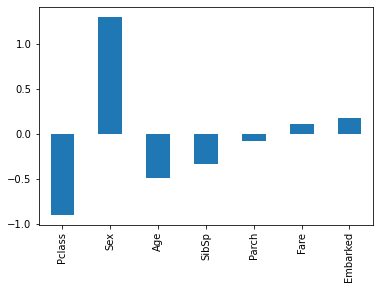

In [61]:
pd.Series(data = logistic.coef_[0],index=X_train.columns).plot(kind='bar')

In [62]:
accuracy_score(y_train, y_train_pred)

0.7991021324354658

In [63]:
confusion_matrix(y_train, y_train_pred)

array([[473,  76],
       [103, 239]], dtype=int64)

In [64]:
cross_val_score(logistic, X_train, y_train, scoring='accuracy', cv=10)

array([0.8       , 0.79775281, 0.76404494, 0.80898876, 0.78651685,
       0.7752809 , 0.78651685, 0.78651685, 0.80898876, 0.83146067])

In [65]:
X_test = pp_test.drop(columns='PassengerId')

In [66]:
X_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [67]:
pp_test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0.627190,0.841916,-0.743497,0.387341,-0.479087,-0.445000,-0.492093,0.606323
892,0.629837,0.841916,1.344995,1.356310,0.481288,-0.445000,-0.508125,-0.622279
893,0.632483,-0.352091,-0.743497,2.519072,-0.479087,-0.445000,-0.456164,0.606323
894,0.635130,0.841916,-0.743497,-0.194041,-0.479087,-0.445000,-0.475981,-0.622279
895,0.637776,0.841916,1.344995,-0.581628,0.481288,0.710763,-0.405895,-0.622279


In [69]:
y_test_pred = logistic.predict(X_test).astype(int)

In [70]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
submission['Survived'] = y_test_pred

In [72]:

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:

submission.to_csv(r"C:\Users\saaip\Downloads\titanic\final_submission3.csv", index=False)